<a href="https://colab.research.google.com/github/nthang2/Hotel-rating-prediction/blob/DucMinh/hotel_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import and load dataset

In [ ]:
import pandas as pd
import numpy as np
# We'll also import seaborn, a Python graphing library
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

## 2. Overview Data

In [ ]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.shape

(20491, 2)

## 3. Perform EDA

In [ ]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.isnull()

,Review,Rating
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
20486,False,False
20487,False,False
20488,False,False
20489,False,False


In [ ]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

<Axes: xlabel='Rating'>

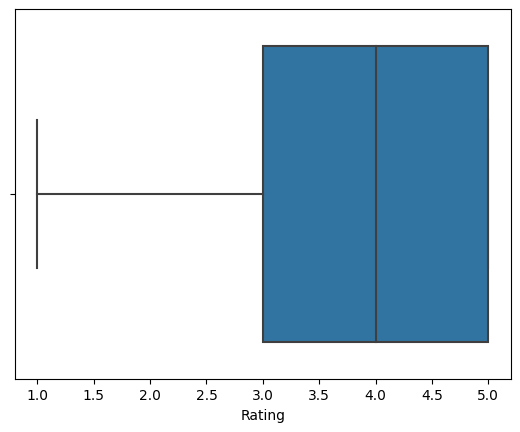

In [ ]:
sns.boxplot(x = df['Rating'])

No outline in dataset

<Axes: xlabel='Rating', ylabel='count'>

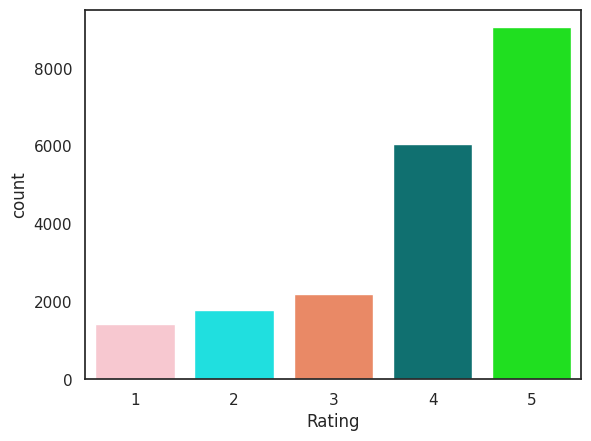

In [ ]:
sns.set_theme(style="white", color_codes=True)
sns.countplot(x = df['Rating'], palette=['pink', 'Aqua','coral','teal', 'lime'])

In [ ]:
df['Word_count']= df['Review'].map(lambda x: len(x.split()))
df.head(10)

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191
5,love monaco staff husband stayed hotel crazy w...,5,134
6,"cozy stay rainy city, husband spent 7 nights m...",5,101
7,"excellent staff, housekeeping quality hotel ch...",4,85
8,"hotel stayed hotel monaco cruise, rooms genero...",5,59
9,excellent stayed hotel monaco past w/e delight...,5,35


<Axes: xlabel='Rating', ylabel='Word_count'>

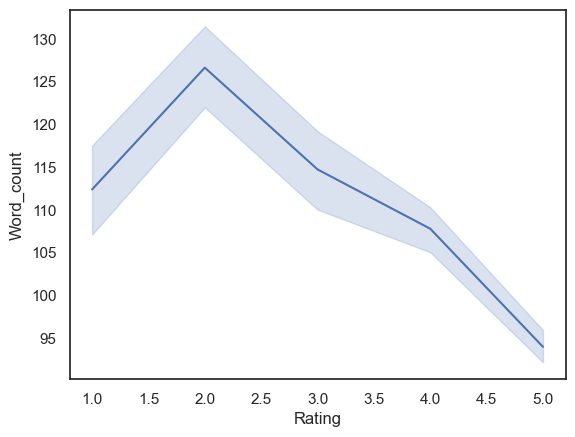

In [ ]:
sns.lineplot(x='Rating', y='Word_count', data=df)

The review rate as 2 is highest

In [ ]:
from textblob import TextBlob

In [ ]:
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity


In [ ]:
def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [ ]:
df['polarity']= df['Review'].apply(polarity)
df['Subjectivity']= df['Review'].apply(subjectivity)

In [ ]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396


In [ ]:
conditions = [
    (df['polarity']>0),
    (df['polarity']<0),
    (df['polarity']==0)
]
values = ['Positive','Negative','Nuetral']
df['polarity_new'] = np.select(conditions,values) #distribute

In [ ]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,Positive


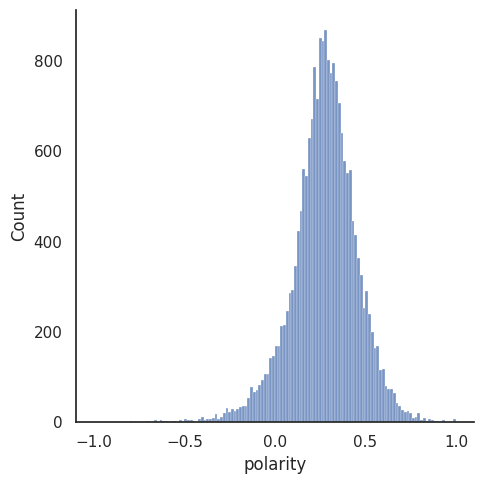

In [ ]:
sns.displot(df['polarity'])

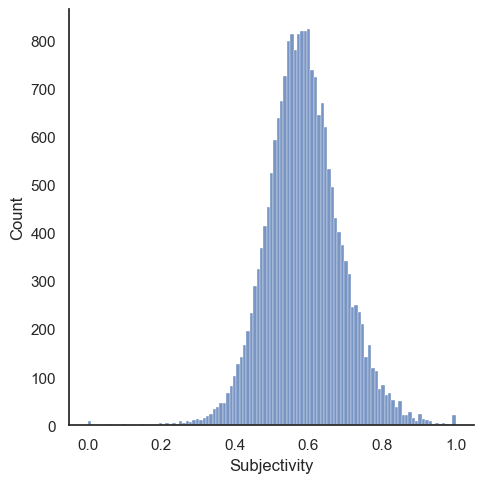

In [ ]:
sns.displot(df['Subjectivity'])

<Axes: xlabel='polarity_new', ylabel='count'>

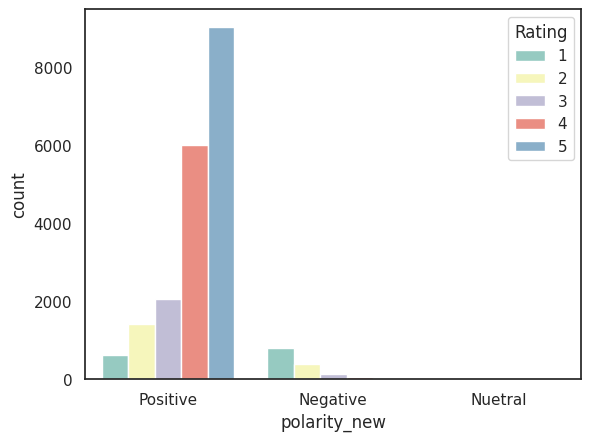

In [ ]:
sns.countplot(x='polarity_new',hue='Rating',data=df, palette="Set3")

## 5.Text Cleaning(Pre-processing of data)

### A. Remove stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#remove stopwords from review column
df['Review'] = df['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df.head()

,Review,Rating,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,0.214923,0.495009,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.384615,0.629396,Positive


### B. Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
# Split the sentences to lists of words.
df['Review_stemming'] = df['Review'].str.split()
# Make sure we see the full column.
pd.set_option('display.max_colwidth', 1)
df['Review_stemming'] = df['Review_stemming'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [ ]:
df.head(3)

,Review,Rating,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,0.208744,0.687000,Positive,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, noisi, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, pay, 40, park, night,]","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath product nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",1
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,0.214923,0.495009,Positive,"[ok, noth, special, charg, diamond, member, hilton, decid, chain, shot, 20th, anniversari, seattle,, start, book, suit, paid, extra, websit, descript, not,, suit, bedroom, bathroom, standard, hotel, room,, took, print, reserv, desk, show, said, thing, like, tv, couch, ect, desk, clerk, told, oh, mix, suit, descript, kimpton, websit, sorri, free, breakfast,, got, kidding,, embassi, suit, sit, room, bathroom, bedroom, unlik, kimpton, call, suite,, 5,

### C. Lemmatization

In [ ]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['Review_lemmatize'] = df.Review.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head(3)

,Review,Rating,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,0.208744,0.687000,Positive,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, did, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, not, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, just, noisi, neighbors,, aveda, bath, product, nice,, did, not, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, have, pay, 40, park, night,]","[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary,, arrived, late, evening, took, advice, previous, review, did, valet, parking,, check, quick, easy,, little, disappointed, non-existent, view, room, room, clean, nice, size,, bed, comfortable, woke, stiff, neck, high, pillows,, not, soundproof, like, heard, music, room, night, morning, loud, bang, door, opening, closing, hear, people, talking, hallway,, maybe, just, noisy, neighbors,, aveda, bath, product, nice,, did, not, goldfish, stay, nice, touch, taken, advantage, staying, longer,, location, great, walking, distance, shopping,, overall, nice, experience, having, pay, 40, parking, night,]"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,0.214923,0.495009,Positive,"[ok, noth, special, charg, diamond, member, hilton, decid, chain, shot, 20th, anniversari, seattle,, start, book, suit, paid, extra, websit, descript, not,, suit, bedroom, bathroom, standard, hotel, room,, took, print, reserv, desk, show, said, thing, like, tv, couch, e

#### make sentences

In [ ]:
import re
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
make_sentences(df,'Review_stemming')
make_sentences(df,'Review_lemmatize')

In [ ]:
df.head(3)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687000,Positive,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,250,0.214923,0.495009,Positive,"ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printou

### D. Word cloud

In [ ]:
rev_stemming = " ".join([review for review in df['Review_stemming']])
rev_stemming[:200]

'nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review did valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, '

In [ ]:
rev_lmtz = " ".join([review for review in df['Review_lemmatize']])
rev_lmtz[:200]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review did valet parking, check quick easy, little disappointed non-existent view room room'

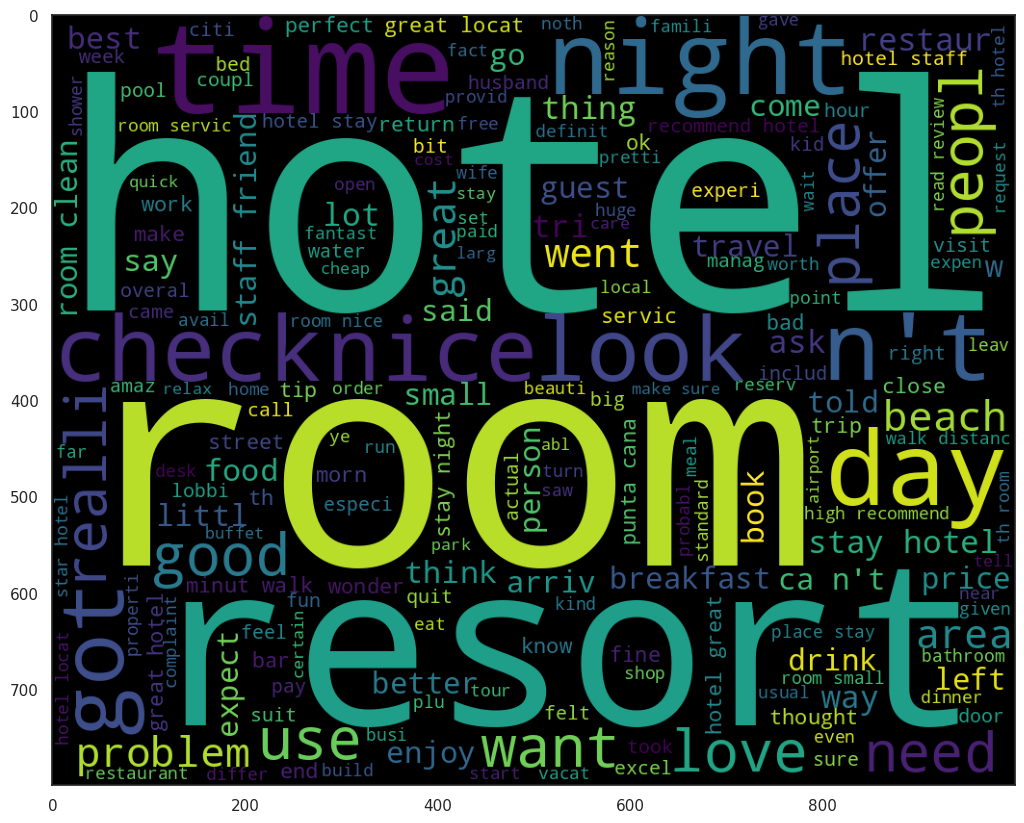

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_stemming)
plt.imshow(wc)

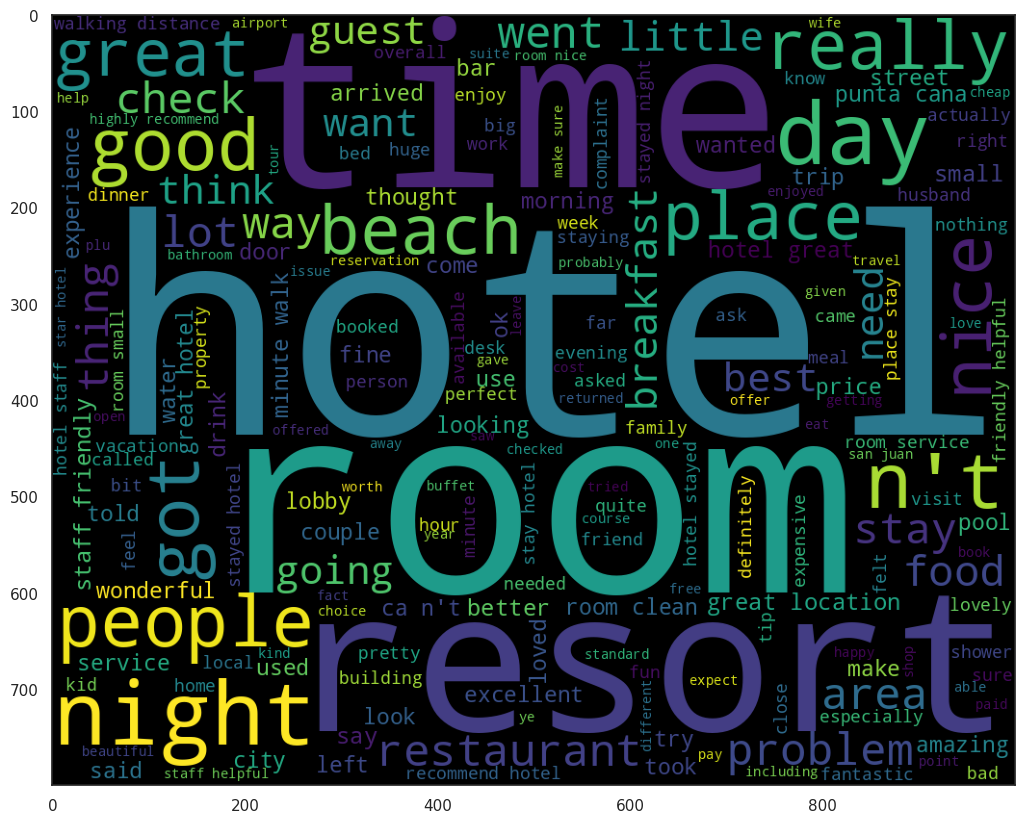

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_lmtz)
plt.imshow(wc)

#### Create sentiment feature

In [ ]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [ ]:
df.head(3)

,Review,Rating,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,0.208744,0.687000,Positive,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review did valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, not soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb just noisi neighbors, aveda bath product nice, did not goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi have pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath product nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",1
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,0.214923,0.495009,Positive,"ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send

## 6.Creating our model

In [ ]:
from sklearn.model_selection import train_test_split
X= df['Review_stemming']
Y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, Y, test_size=0.25, stratify=Y)

### Vectorization(Tfidf)

In [ ]:
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_tfidf= tfidf.fit_transform(X_train.values)
X_test_tfidf= tfidf.transform(X_test.values)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
X_tfidf= tfidf.fit_transform(X.values)

# A. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,y_pred_tfidf))
print(accuracy_score(y_test,y_pred_tfidf))
print(classification_report(y_test,y_pred_tfidf))
print(accuracy_score(y_test, y_pred_tfidf))

[[ 498  306]
 [  78 4241]]
0.9250439195783721
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       804
           1       0.93      0.98      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.90      0.80      0.84      5123
weighted avg       0.92      0.93      0.92      5123

0.9250439195783721


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_tfidf, Y, cv=5)

# In ra các điểm số từ cross-validation
print("Điểm số từ cross-validation: ", scores)
print("Điểm số trung bình: ", scores.mean())

Điểm số từ cross-validation:  [0.92876311 0.9238653  0.92654954 0.9341142  0.91922889]
Điểm số trung bình:  0.9265042087304561


# B. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 291  513]
 [  71 4248]]
              precision    recall  f1-score   support

           0       0.80      0.36      0.50       804
           1       0.89      0.98      0.94      4319

    accuracy                           0.89      5123
   macro avg       0.85      0.67      0.72      5123
weighted avg       0.88      0.89      0.87      5123

0.8860042943587741


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_tfidf, Y, cv=5)

# In ra các điểm số từ cross-validation
print("Điểm số từ cross-validation: ", scores)
print("Điểm số trung bình: ", scores.mean())

Điểm số từ cross-validation:  [0.89607221 0.89238653 0.8909224  0.89287457 0.88799414]
Điểm số trung bình:  0.892049972073561


# C. Naive Bayes

In [ ]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
y_pred  =  classifier.fit(X_train_tfidf,y_train).predict(X_test_tfidf)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 589  215]
 [ 728 3591]]
              precision    recall  f1-score   support

           0       0.45      0.73      0.56       804
           1       0.94      0.83      0.88      4319

    accuracy                           0.82      5123
   macro avg       0.70      0.78      0.72      5123
weighted avg       0.87      0.82      0.83      5123

0.8159281670895959


# D. SVM

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1.0)
y_pred  =  model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 573  231]
 [ 120 4199]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       804
           1       0.95      0.97      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.89      0.84      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9314854577396057


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_tfidf, Y, cv=5)

# In ra các điểm số từ cross-validation
print("Điểm số từ cross-validation: ", scores)
print("Điểm số trung bình: ", scores.mean())

Điểm số từ cross-validation:  [0.91802879 0.92996584 0.92606149 0.9341142  0.92581747]
Điểm số trung bình:  0.926797558380307


# 7. Cross-classification

In [ ]:
from sklearn.model_selection import learning_curve
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train_tfidf, y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

### a. Random forest

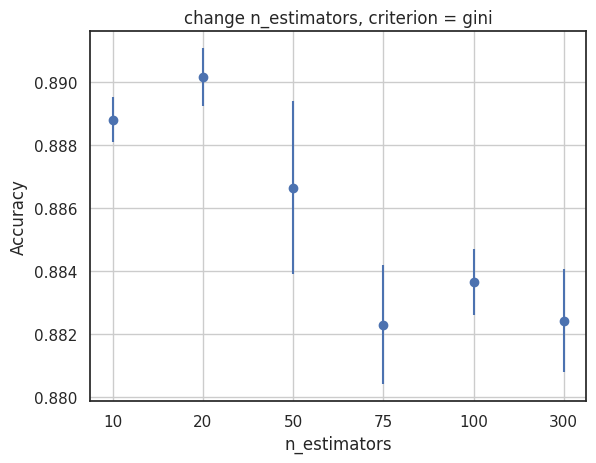

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

title = "change n_estimators, criterion = gini"
x_label = "n_estimators"
X = []
Y = []
error = []

n_estimators = [10, 20, 50, 75, 100, 300]
for n in n_estimators:
    clf_text = RandomForestClassifier(n_estimators = n, random_state=0)
    mean, std = cross_validation(clf_text)
    X.append(str(n))
    Y.append(mean)
    error.append(std)
plot(title, x_label, X, Y, error)
plt.show()

#### Thus, with n_estimators = 20, accuracy is max

### b1. Đánh giá hiệu quả của các kernel trong SVM

100%|██████████| 4/4 [09:52<00:00, 148.21s/it]


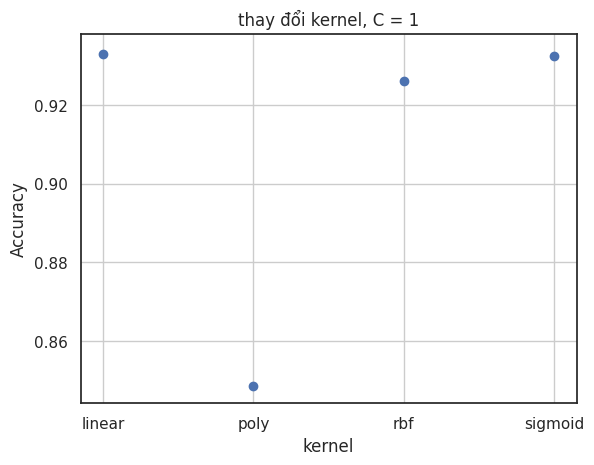

In [ ]:
from tqdm import tqdm
from sklearn import svm
title = "thay đổi kernel, C = 1"
x_label = "kernel"
X = []
Y = []
error = []

for kernel in tqdm(['linear', 'poly', 'rbf', 'sigmoid']):
    # Với mỗi kernel được chọn,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = svm.SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation(text_clf)
    X.append(kernel)
    Y.append(mean)
    error.append(std)

plot(title, x_label, X, Y, error)
plt.show()


### b2. Đánh giá ảnh hưởng của tham số C trong SVM

100%|██████████| 5/5 [07:56<00:00, 95.37s/it]


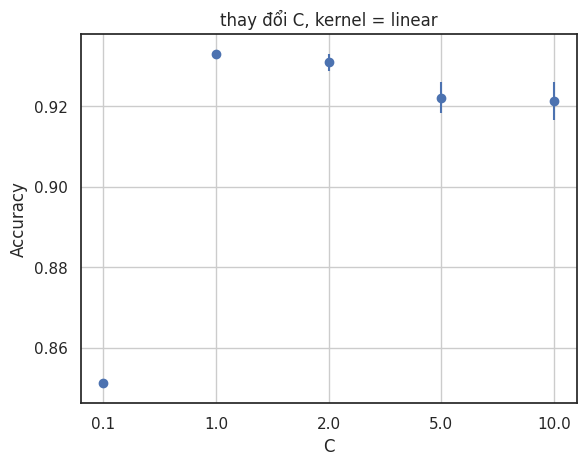

In [ ]:
title = "thay đổi C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

Thus, with C = 1.0, accuracy is max

### c1. Đánh giá ảnh hưởng của tham số C trong Logistic Regression

100%|██████████| 5/5 [00:25<00:00,  5.04s/it]


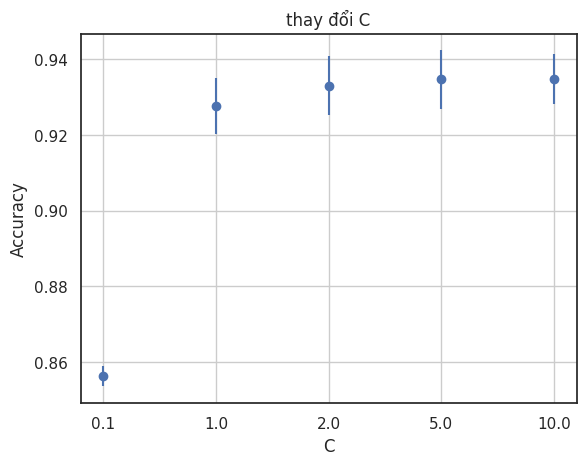

In [ ]:
title = "thay đổi C"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    text_clf = LogisticRegression(C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

Thus, with C = 5.0, accuracy is max

### c2. Đánh giá ảnh hưởng của tham số Pelnaty trong Logistic Regression

100%|██████████| 3/3 [00:05<00:00,  1.91s/it]


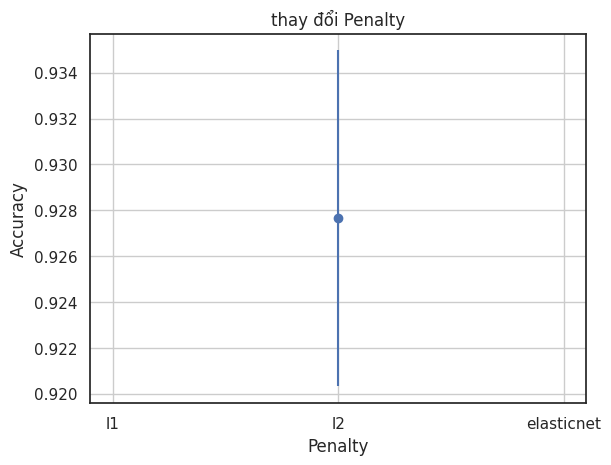

In [ ]:
title = "thay đổi Penalty"
xlabel = "Penalty"
X = []
Y = []
error = []

for penalty in tqdm(['l1', 'l2', 'elasticnet']):
    text_clf = LogisticRegression(penalty=penalty)
    mean, std = cross_validation(text_clf)
    X.append(penalty)
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

Thus.with penalty using l2 , accuracy is max

d1. Đánh giá ảnh hưởng của tham số Var_smoothing trong Naive Bayes

100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


StopIteration: ignored

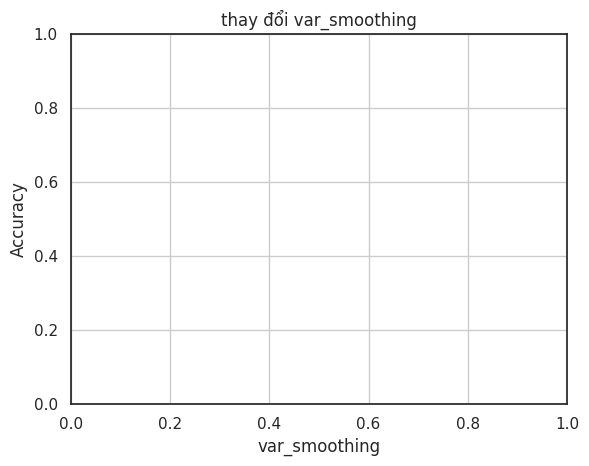

In [ ]:
from sklearn.naive_bayes import GaussianNB
title = "thay đổi var_smoothing"
xlabel = "var_smoothing"
X = []
Y = []
error = []

for var_smoothing in tqdm([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09]):
    text_clf = GaussianNB(var_smoothing=var_smoothing)
    mean, std = cross_validation(text_clf)
    X.append(str(var_smoothing))
    Y.append(mean)
    error.append(std)


plot(title, xlabel, X, Y, error)
plt.show()